In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as ds
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import phik
import shap
shap.initjs()

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xg
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 500)

/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_min

# Leitura dos Dados

Como ainda não há nenhum dado, vou pegar um dataset arbitrário aqui

In [2]:
def load_dataset(path):
    """
    Load dataset from file.

    The target variable must be in column named "target".

    Parameters
    ----------
    path: str
        path to file

    Returns
    -------
    dataset: pd.DataFrame
    """
    data = ds.load_diabetes(as_frame=True)
    dataset = data["frame"]
    dataset.insert(0, "player_id", np.random.choice(range(1, 30), len(dataset)))

    return dataset

In [3]:
dataset = pd.read_parquet("./data/final_datasets/dataset_xg.parquet")
dataset

,player,pos,player_age,last_time_played,last_shots_on_target,last_goals,last_touches,last_yellow_cards,last_completed_passes_perc,last_result,last_xg,last_xag,days_from_last_game,played_at_home,Season_End_Year,Wk,Team,Away,Capacity,tavg,tmin,tmax,prcp,snow,wspd,wpgt,travel_distance,target
0,Ainsley Maitland-Niles,LM,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,2021,1,Fulham,Arsenal,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0
1,Alexandre Lacazette,FW,29,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,2021,1,Fulham,Arsenal,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.9
2,Dani Ceballos,CM,24,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,2021,1,Fulham,Arsenal,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0
3,Eddie Nketiah,FW,21,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,2021,1,Fulham,Arsenal,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0
4,Granit Xhaka,CM,27,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,2021,1,Fulham,Arsenal,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,Joao Moutinho,CM,34,79.0,0.0,0.0,83.0,0.0,76.0,lose,0.0,0.1,3.0,False,2022,3,Wolves,Manchester Utd,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.0
6885,Leander Dendoncker,CM,26,11.0,0.0,0.0,10.0,0.0,100.0,lose,0.0,0.0,3.0,False,2022,3,Wolves,Manchester Utd,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.0
6886,Morgan Gibbs-White,CM,21,67.0,1.0,0.0,38.0,0.0,85.2,lose,0.1,0.0,3.0,False,2022,3,Wolves,Manchester Utd,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.1
6887,Ruben Neves,CM,24,90.0,0.0,0.0,91.0,1.0,86.3,lose,0.0,0.0,3.0,False,2022,3,Wolves,Manchester Utd,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.1


In [4]:
dataset.drop(["Season_End_Year", "Team", "Away"], axis=1, inplace=True)
dataset

,player,pos,player_age,last_time_played,last_shots_on_target,last_goals,last_touches,last_yellow_cards,last_completed_passes_perc,last_result,last_xg,last_xag,days_from_last_game,played_at_home,Wk,Capacity,tavg,tmin,tmax,prcp,snow,wspd,wpgt,travel_distance,target
0,Ainsley Maitland-Niles,LM,23,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0
1,Alexandre Lacazette,FW,29,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.9
2,Dani Ceballos,CM,24,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0
3,Eddie Nketiah,FW,21,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0
4,Granit Xhaka,CM,27,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,False,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,Joao Moutinho,CM,34,79.0,0.0,0.0,83.0,0.0,76.0,lose,0.0,0.1,3.0,False,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.0
6885,Leander Dendoncker,CM,26,11.0,0.0,0.0,10.0,0.0,100.0,lose,0.0,0.0,3.0,False,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.0
6886,Morgan Gibbs-White,CM,21,67.0,1.0,0.0,38.0,0.0,85.2,lose,0.1,0.0,3.0,False,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.1
6887,Ruben Neves,CM,24,90.0,0.0,0.0,91.0,1.0,86.3,lose,0.0,0.0,3.0,False,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.1


# Transformação de Features Categóricos em Numéricos

In [5]:
def categorical_to_one_hot_encoding(dataset, categorical_columns):
    """
    Convert categorical columns to one hot encoding.

    Parameters
    ----------
    dataset : pd.DataFrame
        The dataset to be converted.
    categorical_columns : list
        The list of categorical columns.

    Returns
    -------
    dataset_converted : pd.DataFrame
        The converted dataset.
    """
    dataset_converted = dataset.copy()
    for column in categorical_columns:
        dataset_converted = pd.concat([dataset_converted, pd.get_dummies(dataset_converted[column], prefix=column, dtype=float)], axis=1)
        dataset_converted.drop(column, axis=1, inplace=True)

    return dataset_converted

In [6]:
dataset_converted = categorical_to_one_hot_encoding(dataset, categorical_columns=["pos", "played_at_home", "last_result"])
dataset_converted

,player,player_age,last_time_played,last_shots_on_target,last_goals,last_touches,last_yellow_cards,last_completed_passes_perc,last_xg,last_xag,days_from_last_game,Wk,Capacity,tavg,tmin,tmax,prcp,snow,wspd,wpgt,travel_distance,target,pos_AM,pos_CM,pos_FW,pos_LM,pos_LW,pos_RM,pos_RW,played_at_home_False,played_at_home_True,last_result_0,last_result_draw,last_result_lose,last_result_win
0,Ainsley Maitland-Niles,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Alexandre Lacazette,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Dani Ceballos,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Eddie Nketiah,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Granit Xhaka,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,25700,16.2,11.7,21.3,0.3,0.0,14.3,31.5,5748.416939,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,Joao Moutinho,34,79.0,0.0,0.0,83.0,0.0,76.0,0.0,0.1,3.0,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6885,Leander Dendoncker,26,11.0,0.0,0.0,10.0,0.0,100.0,0.0,0.0,3.0,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6886,Morgan Gibbs-White,21,67.0,1.0,0.0,38.0,0.0,85.2,0.1,0.0,3.0,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6887,Ruben Neves,24,90.0,0.0,0.0,91.0,1.0,86.3,0.0,0.0,3.0,3,27828,14.4,10.7,19.2,0.0,0.0,10.8,24.1,194.088306,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Divisão do Dataset entre Treino e Teste

In [7]:
def split_dataset(dataset, test_percentage):
    """
    Splits dataset into training data and test data

    Parameters
    ----------
    dataset : pd.DataFrame
        Dataset to split
    test_percentage : float
        Percentage of data to use for test data

    Returns
    -------
    tuple
        Tuple containing training data and test data
    """
    X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset.drop("target", axis=1), dataset["target"], test_size=test_percentage, random_state=42)
    X_train.reset_index(inplace=True, drop=True)
    X_test.reset_index(inplace=True, drop=True)
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = split_dataset(dataset_converted, 0.2)
X_train

,player,player_age,last_time_played,last_shots_on_target,last_goals,last_touches,last_yellow_cards,last_completed_passes_perc,last_xg,last_xag,days_from_last_game,Wk,Capacity,tavg,tmin,tmax,prcp,snow,wspd,wpgt,travel_distance,pos_AM,pos_CM,pos_FW,pos_LM,pos_LW,pos_RM,pos_RW,played_at_home_False,played_at_home_True,last_result_0,last_result_draw,last_result_lose,last_result_win
0,Helder Costa,26,70.0,0.0,0.0,29.0,0.0,68.4,0.1,0.0,4.0,24,42785,8.9,6.2,11.2,0.2,0.0,13.4,31.5,142.594177,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Mason Greenwood,19,90.0,1.0,0.0,51.0,0.0,90.0,0.4,0.4,21.0,30,75811,6.7,-0.0,13.0,0.0,0.0,13.1,40.8,326.070330,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Christian Benteke,30,18.0,0.0,0.0,9.0,0.0,83.3,0.0,0.0,5.0,14,39460,9.5,7.4,10.7,4.0,0.0,20.8,42.6,282.986207,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Ollie Watkins,25,90.0,1.0,1.0,22.0,0.0,64.3,0.7,0.0,5.0,31,45276,3.4,-0.9,7.3,0.0,0.0,9.0,29.6,125.279148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Gabriel Jesus,24,45.0,0.0,0.0,18.0,0.0,94.1,0.0,0.0,9.0,34,26309,6.7,0.9,10.8,2.6,0.0,6.9,20.4,174.513945,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,Jarrod Bowen,24,80.0,0.0,0.0,30.0,0.0,62.5,0.0,0.2,4.0,11,35303,10.7,8.6,12.6,0.1,0.0,18.5,38.9,292.975538,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5507,Sadio Mane,28,29.0,0.0,0.0,18.0,0.0,66.7,0.2,0.0,8.0,28,27828,7.5,4.6,10.4,0.3,0.0,18.7,31.5,108.732131,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5508,Adam Lallana,32,90.0,0.0,0.0,56.0,0.0,80.0,0.0,0.0,6.0,29,22374,5.3,-1.3,9.3,0.0,0.0,7.1,18.5,468.879430,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5509,Sean Longstaff,23,15.0,0.0,0.0,8.0,0.0,85.7,0.0,0.0,14.0,30,52409,6.7,2.5,10.8,0.0,0.0,21.6,55.5,274.794449,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Normalização das Features

In [9]:
def normalize_data(X_train, X_test, y_train, y_test, index_column):
    """
    Normalize data, including target column, in the dataset

    Parameters
    ----------
    X_train : pd.DataFrame
        Training data
    X_test : pd.DataFrame
        Testing data
    y_train : pd.DataFrame
        Training target column
    y_test : pd.DataFrame
        Testing target column
    index_column : str
        Name of the index column that will not be changed

    Returns
    -------
    X_scaler : sklearn.preprocessing.StandardScaler
        Scaler used to normalize the features dataset
    y_scaler : sklearn.preprocessing.StandardScaler
        Scaler used to normalize the target data
    X_train_normalized : pd.DataFrame
        Normalized training data
    X_test_normalized : pd.DataFrame
        Normalized testing data
    y_train_normalized : pd.DataFrame
        Normalized training target column
    y_test_normalized : pd.DataFrame
        Normalized testing target column
    """
    X_scaler = preprocessing.StandardScaler()
    y_scaler = preprocessing.StandardScaler()
    X_train_normalized = X_scaler.fit_transform(X_train.drop(index_column, axis=1))
    X_test_normalized = X_scaler.transform(X_test.drop(index_column, axis=1))

    X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.drop(index_column, axis=1).columns)
    # X_train_normalized.insert(0, index_column, X_train[index_column])
    # X_train_normalized[index_column] = X_train[index_column]
    X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.drop(index_column, axis=1).columns)
    # X_test_normalized.insert(0, index_column, X_test[index_column])
    
    y_train_normalized = pd.Series(y_scaler.fit_transform(np.reshape(y_train.values, (-1, 1))).squeeze(), name="target")
    y_test_normalized = pd.Series(y_scaler.transform(np.reshape(y_test.values, (-1, 1))).squeeze(), name="target")

    return X_scaler, y_scaler, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized

In [10]:
X_scaler, y_scaler, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = normalize_data(X_train, X_test, y_train, y_test, "player")
X_train_normalized

,player_age,last_time_played,last_shots_on_target,last_goals,last_touches,last_yellow_cards,last_completed_passes_perc,last_xg,last_xag,days_from_last_game,Wk,Capacity,tavg,tmin,tmax,prcp,snow,wspd,wpgt,travel_distance,pos_AM,pos_CM,pos_FW,pos_LM,pos_LW,pos_RM,pos_RW,played_at_home_False,played_at_home_True,last_result_0,last_result_draw,last_result_lose,last_result_win
0,-0.028105,0.267138,-0.581912,-0.355543,-0.258753,-0.303593,-0.103206,-0.168904,-0.479579,-0.488804,0.422361,0.239793,0.106102,0.247590,-0.096201,-0.369696,-0.043376,-0.094634,-0.020597,-0.189413,-0.350188,-0.541626,-0.647223,-0.316575,-0.299627,3.155355,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,1.344942,-0.792506
1,-1.894202,0.864573,0.751525,-0.355543,0.605602,-0.303593,0.791882,0.914299,1.844412,1.010888,0.968946,2.796462,-0.419452,-1.199925,0.282367,-0.418714,-0.043376,-0.142346,0.594187,0.008229,-0.350188,-0.541626,-0.647223,-0.316575,-0.299627,-0.316922,2.935609,0.68413,-0.68413,-0.228296,-0.513518,1.344942,-0.792506
2,1.038236,-1.286192,-0.581912,-0.355543,-1.044530,-0.303593,0.514239,-0.529972,-0.479579,-0.400587,-0.488614,-0.017609,0.249434,0.527754,-0.201359,0.561651,-0.043376,1.082269,0.713178,-0.038181,-0.350188,-0.541626,1.545062,-0.316575,-0.299627,-0.316922,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,-0.743527,1.261821
3,-0.294690,0.864573,0.751525,2.131004,-0.533775,-0.303593,-0.273107,1.997502,-0.479579,-0.400587,1.060044,0.432630,-1.207781,-1.410048,-0.916431,-0.418714,-0.043376,-0.794414,-0.146198,-0.208064,-0.350188,-0.541626,1.545062,-0.316575,-0.299627,-0.316922,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,-0.743527,1.261821
4,-0.561276,-0.479655,-0.581912,-0.355543,-0.690931,-0.303593,0.961783,-0.529972,-0.479579,-0.047718,1.333336,-1.035678,-0.419452,-0.989801,-0.180327,0.218523,-0.043376,-1.128400,-0.754372,-0.155028,-0.350188,-0.541626,1.545062,-0.316575,-0.299627,-0.316922,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,-0.743527,1.261821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,-0.561276,0.565855,-0.581912,-0.355543,-0.219464,-0.303593,-0.347698,-0.529972,0.682417,-0.488804,-0.761907,-0.339418,0.536100,0.807918,0.198241,-0.394205,-0.043376,0.716475,0.468586,-0.027421,-0.350188,-0.541626,-0.647223,-0.316575,-0.299627,-0.316922,2.935609,0.68413,-0.68413,-0.228296,-0.513518,-0.743527,1.261821
5507,0.505066,-0.957603,-0.581912,-0.355543,-0.690931,-0.303593,-0.173653,0.192163,-0.479579,-0.135935,0.786751,-0.918086,-0.228341,-0.125962,-0.264453,-0.345187,-0.043376,0.748283,-0.020597,-0.225889,-0.350188,-0.541626,-0.647223,-0.316575,3.337479,-0.316922,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,1.344942,-0.792506
5508,1.571407,0.864573,-0.581912,-0.355543,0.802046,-0.303593,0.377489,-0.529972,-0.479579,-0.312370,0.877849,-1.340302,-0.753894,-1.503436,-0.495800,-0.418714,-0.043376,-1.096592,-0.879973,0.162064,-0.350188,1.846294,-0.647223,-0.316575,-0.299627,-0.316922,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,-0.743527,1.261821
5509,-0.827861,-1.375807,-0.581912,-0.355543,-1.083819,-0.303593,0.613693,-0.529972,-0.479579,0.393367,0.968946,0.984823,-0.419452,-0.616249,-0.180327,-0.418714,-0.043376,1.209502,1.565944,-0.047006,-0.350188,1.846294,-0.647223,-0.316575,-0.299627,-0.316922,-0.340645,0.68413,-0.68413,-0.228296,-0.513518,1.344942,-0.792506


# Regressão

In [11]:
def grid_search(X_train, y_train, regressor, param_grid, scoring='r2'):
    """
    Performs grid search for regression model.

    Parameters
    ----------
    X_train : array-like
        Training data.
    X_test : array-like
        Testing data.
    y_train : array-like
        Training labels.
    y_test : array-like
        Testing labels.
    regressor : object
        Regression model
    param_grid : dict
        Dictionary of parameters to search over.

    Returns
    -------
    best_params : dict
        Best parameters found.
    best_score : float
        Best score.
    """
    grid_search = model_selection.GridSearchCV(regressor, param_grid, scoring=scoring, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

def optimize_model(X_train, y_train, model, scoring='r2', feature_selection=False, selected_features=None):
    """
    Performs grid search with cross validation for a given model and returns the best one.

    Parameters
    ----------
    X_train : array-like
        Training data.
    y_train : array-like
        Training labels.
    model : {'linear', 'decision_tree', 'random_forest', 'svr'}
        Name of the model to use.

    Returns
    -------
    best_params : dict
        Best parameters found.
    best_score : float
        Best score.
    """
    if model == "linear":
        regressor = LinearRegression()
        param_grid = {"fit_intercept": [True, False]}
    elif model == "decision_tree":
        regressor = DecisionTreeRegressor(random_state=0)
        param_grid = {
            "criterion": ["squared_error", "poisson"],
            "splitter": ["best", "random"],
            "max_depth": [5, 20, 50,  None],
            "min_samples_split": [2, 5, 20, 50]
        }
    elif model == "random_forest":
        regressor = RandomForestRegressor(random_state=0)
        param_grid = {
            "n_estimators": [10, 50, 100, 200],
            "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "max_depth": [5, 10, 20, 50, 100, None],
            "min_samples_split": [2, 5, 10, 20, 50, 100],
            "max_features": ["sqrt", "log2", None]
        }
    elif model == "xgboost":
        regressor = xg.XGBRegressor(random_state=0, objective ='reg:squarederror')
        # param_grid = {
        #     "n_estimators": [10, 50, 100, 200],
        #     "eta": [0.1, 0.3, 0.7],
        #     "max_depth": [5, 10, 20, 50, None],
        #     "sampling_method": ["uniform", "gradient_based"]
        # }
        param_grid = {
            "n_estimators": [200, 300],
            "eta": [0.1, 0.3],
            "max_depth": [5, 10, 20],
            "sampling_method": ["uniform", "gradient_based"]
        }
    elif model == "svr":
        regressor = SVR()
        param_grid = {
            "kernel": ["linear", "poly", "rbf"],
            "degree": [2, 3, 4],
            "gamma": ["auto"],
            "C": [0.1, 1]
        }
    else:
        raise ValueError("Model not available")
    
    if feature_selection:
        X_train = X_train[selected_features]
        
    best_params, best_score = grid_search(X_train, y_train, regressor, param_grid, scoring)

    return best_params, best_score

In [12]:
X_train_wo_player = X_train.drop("player", axis=1)
X_test_wo_player = X_test.drop("player", axis=1)

In [13]:
correlations = pd.concat([X_train_wo_player, y_train], axis=1).phik_matrix()["target"].abs().sort_values(ascending=False)
selected_features = list(correlations[correlations > 0].index)
selected_features.remove("target")
selected_features

interval columns not set, guessing: ['player_age', 'last_time_played', 'last_shots_on_target', 'last_goals', 'last_touches', 'last_yellow_cards', 'last_completed_passes_perc', 'last_xg', 'last_xag', 'days_from_last_game', 'Wk', 'Capacity', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'wpgt', 'travel_distance', 'pos_AM', 'pos_CM', 'pos_FW', 'pos_LM', 'pos_LW', 'pos_RM', 'pos_RW', 'played_at_home_False', 'played_at_home_True', 'last_result_0', 'last_result_draw', 'last_result_lose', 'last_result_win', 'target']


['last_completed_passes_perc',
 'tavg',
 'wpgt',
 'Wk',
 'tmin',
 'pos_RW',
 'tmax',
 'last_result_win',
 'last_result_0',
 'player_age',
 'prcp',
 'pos_FW',
 'pos_LM',
 'pos_RM',
 'last_result_draw',
 'last_result_lose',
 'Capacity',
 'snow']

In [14]:
def run_test(regressor, X_train, X_test, y_train, y_test, feature_selection=False, selected_features=None):
    if feature_selection:
        X_train = X_train[selected_features]
        X_test = X_test[selected_features]

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return r2_score(y_test, y_pred)

## Linear Regression

In [98]:
best_params, best_score = optimize_model(X_train_wo_player, y_train, model="linear")
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = LinearRegression(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_wo_player, X_test_wo_player, y_train, y_test))

Best params:  {'fit_intercept': False}
Best R2: 0.110
R2 in test: 0.131


In [99]:
best_params, best_score = optimize_model(X_train_normalized, y_train_normalized, model="linear")
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = LinearRegression(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized))

Best params:  {'fit_intercept': False}
Best R2: 0.111
R2 in test: 0.131


In [100]:
best_params, best_score = optimize_model(X_train_wo_player, y_train, model="linear", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = LinearRegression(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_wo_player, X_test_wo_player, y_train, y_test, feature_selection=True, selected_features=selected_features))

Best params:  {'fit_intercept': False}
Best R2: 0.067
R2 in test: 0.067


In [101]:
best_params, best_score = optimize_model(X_train_normalized, y_train_normalized, model="linear", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = LinearRegression(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized, feature_selection=True, selected_features=selected_features))

Best params:  {'fit_intercept': False}
Best R2: 0.067
R2 in test: 0.067


## Decision Tree

In [102]:
best_params, best_score = optimize_model(X_train_wo_player, y_train, model="decision_tree")
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = DecisionTreeRegressor(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_wo_player, X_test_wo_player, y_train, y_test))

Best params:  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best R2: 0.123
R2 in test: 0.102


In [103]:
best_params, best_score = optimize_model(X_train_normalized, y_train_normalized, model="decision_tree")
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = DecisionTreeRegressor(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized))

Best params:  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
Best R2: 0.123
R2 in test: 0.085



160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

One or more of the test sc

In [104]:
best_params, best_score = optimize_model(X_train_wo_player, y_train, model="decision_tree", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = DecisionTreeRegressor(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_wo_player, X_test_wo_player, y_train, y_test, feature_selection=True, selected_features=selected_features))

Best params:  {'criterion': 'poisson', 'max_depth': 5, 'min_samples_split': 50, 'splitter': 'best'}
Best R2: 0.079
R2 in test: 0.081


In [105]:
best_params, best_score = optimize_model(X_train_normalized, y_train_normalized, model="decision_tree", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = DecisionTreeRegressor(**best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized, feature_selection=True, selected_features=selected_features))

Best params:  {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 20, 'splitter': 'best'}
Best R2: 0.067
R2 in test: 0.083



160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/eduardo/anaconda3/envs/inno-ml/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

One or more of the test sc

## XGBoost

In [106]:
best_params, best_score = optimize_model(X_train_wo_player, y_train, model="xgboost", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = regressor = xg.XGBRegressor(random_state=0, objective ='reg:squarederror', **best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_wo_player, X_test_wo_player, y_train, y_test))

Best params:  {'eta': 0.1, 'max_depth': 5, 'n_estimators': 200, 'sampling_method': 'uniform'}
Best R2: 0.044
R2 in test: 0.222


In [107]:
best_params, best_score = optimize_model(X_train_normalized, y_train_normalized, model="xgboost")
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = regressor = xg.XGBRegressor(random_state=0, objective ='reg:squarederror', **best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized))

Best params:  {'eta': 0.1, 'max_depth': 10, 'n_estimators': 300, 'sampling_method': 'uniform'}
Best R2: 0.288
R2 in test: 0.357


In [108]:
best_params, best_score = optimize_model(X_train_wo_player, y_train, model="xgboost", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = regressor = xg.XGBRegressor(random_state=0, objective ='reg:squarederror', **best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_wo_player, X_test_wo_player, y_train, y_test, feature_selection=True, selected_features=selected_features))

Best params:  {'eta': 0.1, 'max_depth': 5, 'n_estimators': 200, 'sampling_method': 'uniform'}
Best R2: 0.044
R2 in test: 0.105


In [109]:
best_params, best_score = optimize_model(X_train_normalized, y_train_normalized, model="xgboost", feature_selection=True, selected_features=selected_features)
print("Best params: ", best_params)
print("Best R2: %.3f" % best_score)

regressor = regressor = xg.XGBRegressor(random_state=0, objective ='reg:squarederror', **best_params)
print("R2 in test: %.3f" % run_test(regressor, X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized, feature_selection=True, selected_features=selected_features))

Best params:  {'eta': 0.1, 'max_depth': 5, 'n_estimators': 200, 'sampling_method': 'uniform'}
Best R2: 0.055
R2 in test: 0.110


# SHAP Values

In [15]:
def regression_with_shap_value(X, y, model):
    """
    This function takes in a model and returns the SHAP values for the model.
    
    Parameters
    ----------
    X : pd.DataFrame
        The input data.
    y : pd.Series
        The target data.
    model : sklearn model
        The model to be explained.
        
    Returns
    -------
    explainer : shap.explainer
        The SHAP explainer.
    shap_values : numpy array
        The SHAP values for the model.
    """
    model.fit(X, y)
    explainer = shap.Explainer(model)
    shap_values = explainer(X)
    return explainer, shap_values

In [28]:
colunas_rename = {
    "pos_FW": "Pos Atacante",
    "last_time_played": "Tempo jogado no último jogo (min)",
    "last_touches": "Toques no último jogo",
    "last_xg": "xG no último jogo",
    "last_completed_passes_perc": "Percentual de passes completados no último jogo",
    "player_age": "Idade do jogador",
    "days_from_last_game": "Dias desde o último jogo",
    "Capacity": "Capacidade do estádio",
    "travel_distance": "Distância viajada para o jogo (Km)",
    "pos_LW": "Pos Lateral Esquerdo",
    "last_xag": "xAG no último jogo",
    "tmax": "Temperatura máxima",
    "wspd": "Velocidade do vento média",
    "Wk": "Semana do campeonato",
    "pos_CM": "Pos Meio-Campista",
    "tavg": "Temperatura média",
    "wpgt": "Rajada de vento máxima",
    "tmin": "Temperatura mínima",
    "pos_RW": "Pos Lateral Direito",
    "played_at_home_False": "Jogar fora de casa",
    "pos_AM": "Pos Atacante Meio-Campista",
    "last_shots_on_target": "Chutes a gol no último jogo",
    "last_goals": "Gols no último jogo",
    "last_result_win": "Vitória no útimo jogo",
    "prcp": "Precipitação (mm)",
    "last_result_draw": "Empate no último jogo",
    "last_result_lose": "Derrota no último jogo",
    "pos_RM": "Pos Meio-Campista Direito",
    "last_yellow_cards": "Cartões amarelo no último jogo",
    "pos_LM": "Pos Meio-Campista Esquerdo",
    "snow": "Neve",
    "played_at_home_True": "Jogar em casa",
}

In [29]:
X = pd.concat([X_train_normalized, X_test_normalized])
y = pd.concat([y_train_normalized, y_test_normalized])

X_renamed = X.rename(columns=colunas_rename)

params = {'eta': 0.1, 'max_depth': 10, 'n_estimators': 300, 'sampling_method': 'uniform'}
regressor = xg.XGBRegressor(random_state=0, objective ='reg:squarederror', **params)
explainer, shap_values = regression_with_shap_value(X_renamed, y, regressor)
shap_values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


.values =
array([[-1.3987309e-02, -4.2536668e-03, -4.9583282e-04, ...,
        -9.2367589e-04,  3.4090148e-03, -6.1399830e-03],
       [ 2.4361013e-02,  2.1594058e-01,  2.0731391e-02, ...,
        -1.9026713e-03,  5.6588897e-03, -8.2853884e-03],
       [ 4.5273146e-03, -7.6110280e-01, -1.8817024e-02, ...,
         1.1948986e-02,  6.2659308e-03,  4.7016875e-03],
       ...,
       [ 1.2791972e-03, -3.9413437e-02, -1.4411314e-02, ...,
        -4.2214026e-03,  1.5205742e-03,  1.0170589e-02],
       [-1.4390480e-02, -4.0296647e-01,  3.1393252e-02, ...,
        -1.9396175e-02, -1.7902683e-03,  2.1220341e-02],
       [-2.7325930e-02, -2.3999237e-02,  2.5783465e-03, ...,
        -4.7108904e-03,  4.9102576e-03, -4.9282792e-03]], dtype=float32)

.base_values =
array([0.01001281, 0.01001281, 0.01001281, ..., 0.01001281, 0.01001281,
       0.01001281], dtype=float32)

.data =
array([[-0.02810489,  0.26713812, -0.58191156, ..., -0.51351824,
         1.34494182, -0.79250552],
       [-1.89420205,  

In [32]:
shap_values_df = pd.DataFrame(shap_values.values, columns=X_renamed.columns)
shap_values_df

,Idade do jogador,Tempo jogado no último jogo (min),Chutes a gol no último jogo,Gols no último jogo,Toques no último jogo,Cartões amarelo no último jogo,Percentual de passes completados no último jogo,xG no último jogo,xAG no último jogo,Dias desde o último jogo,Semana do campeonato,Capacidade do estádio,Temperatura média,Temperatura mínima,Temperatura máxima,Precipitação (mm),Neve,Velocidade do vento média,Rajada de vento máxima,Distância viajada para o jogo (Km),Pos Atacante Meio-Campista,Pos Meio-Campista,Pos Atacante,Pos Meio-Campista Esquerdo,Pos Lateral Esquerdo,Pos Meio-Campista Direito,Pos Lateral Direito,Jogar fora de casa,Jogar em casa,last_result_0,Empate no último jogo,Derrota no último jogo,Vitória no útimo jogo
0,-0.013987,-0.004254,-0.000496,-0.013437,-0.021848,-0.002623,0.043870,0.000918,-0.017707,-0.004828,-0.019441,0.036589,0.038584,-0.010577,0.024609,-0.008098,-0.000103,-0.007265,-0.011870,-0.005909,-0.019810,0.011135,-0.097141,0.003812,-0.017351,-0.033096,-0.046697,-0.009690,0.0,0.0,-0.000924,0.003409,-0.006140
1,0.024361,0.215941,0.020731,-0.000174,0.100653,0.006287,0.101274,0.557873,0.115441,0.211753,0.004882,0.078034,0.009001,0.012496,-0.020586,-0.009623,-0.000151,-0.027363,-0.019271,0.059695,-0.000173,0.058962,-0.016746,0.003162,-0.036652,0.002853,0.144881,0.013553,0.0,0.0,-0.001903,0.005659,-0.008285
2,0.004527,-0.761103,-0.018817,-0.011469,0.304529,-0.007049,0.021229,-0.094901,-0.008759,0.057119,-0.023743,0.035760,-0.014559,-0.012558,-0.039595,-0.009269,-0.000231,0.005583,-0.020730,0.010686,-0.002658,0.006350,0.362084,0.001337,-0.014195,0.002875,-0.006151,-0.010807,0.0,0.0,0.011949,0.006266,0.004702
3,-0.168659,0.102380,-0.004240,0.022327,-0.141589,-0.001287,-0.037990,0.024084,-0.012687,-0.025921,-0.010880,0.022479,-0.016437,-0.048733,0.002390,0.005878,-0.000069,-0.016058,-0.037323,-0.016217,-0.008812,0.008825,0.197787,0.001792,-0.011509,0.001116,-0.005289,-0.023065,0.0,0.0,-0.007116,-0.001430,0.020990
4,-0.016952,-0.040879,-0.002620,-0.013759,0.196547,-0.002213,0.128576,-0.043461,0.000605,0.101972,0.072480,-0.030043,-0.008786,0.065529,0.020332,0.004066,-0.000108,0.012205,-0.030293,0.012276,-0.002931,0.008672,0.460274,0.001321,-0.007383,0.001511,-0.005138,-0.068922,0.0,0.0,0.004682,-0.001184,0.047691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,0.018787,-0.135221,-0.000382,-0.015303,0.102184,-0.000633,-0.052578,0.022157,-0.034783,-0.006066,-0.022935,-0.107236,-0.007116,0.007094,-0.009963,-0.033051,-0.000086,0.049763,0.051015,-0.031424,-0.020367,-0.001920,-0.234624,-0.020472,-0.031526,0.004725,-0.040366,-0.012660,0.0,0.0,0.030248,-0.002186,-0.003237
6885,-0.042671,-0.036201,-0.033536,-0.024057,-0.139262,-0.015351,0.198760,-0.036645,-0.063594,-0.249317,-0.012943,-0.032967,0.002660,-0.061192,0.006408,-0.021292,-0.000161,-0.024121,-0.045665,-0.091659,-0.008047,0.010578,0.156965,0.004165,-0.013056,0.004677,-0.008420,-0.004404,0.0,0.0,-0.004291,0.015766,0.002742
6886,0.001279,-0.039413,-0.014411,-0.005035,-0.014576,-0.000258,-0.032859,-0.091247,-0.008991,0.029232,-0.007124,0.020189,-0.001142,-0.023146,-0.029898,-0.007947,-0.000254,-0.015655,-0.010040,0.009671,-0.010546,-0.039576,-0.212919,0.000949,-0.029769,0.002050,-0.012453,-0.010622,0.0,0.0,-0.004221,0.001521,0.010171
6887,-0.014390,-0.402966,0.031393,0.218170,-0.052572,-0.007669,0.056228,0.232314,0.000631,-0.023692,-0.018481,0.021621,0.032929,-0.004027,-0.031407,0.002327,-0.000070,-0.002391,-0.015459,0.051475,-0.009440,0.027089,-0.129933,0.001694,0.157507,-0.000724,-0.007083,0.049462,0.0,0.0,-0.019396,-0.001790,0.021220


# Visualizações

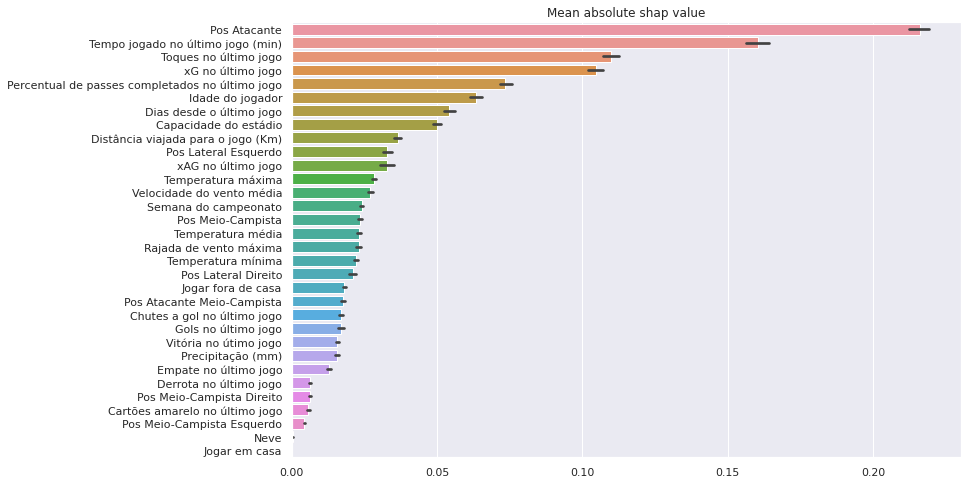

In [33]:
shap_values_df.drop("last_result_0", axis=1, inplace=True)
columns = shap_values_df.apply(np.abs).mean().sort_values(ascending=False).index
fig = plt.figure(figsize=(12,8))

sns.barplot(data=shap_values_df[columns].apply(np.abs).values, orient='h')
plt.title("Mean absolute shap value")
plt.yticks(ticks=np.arange(32), labels=columns)

plt.show()


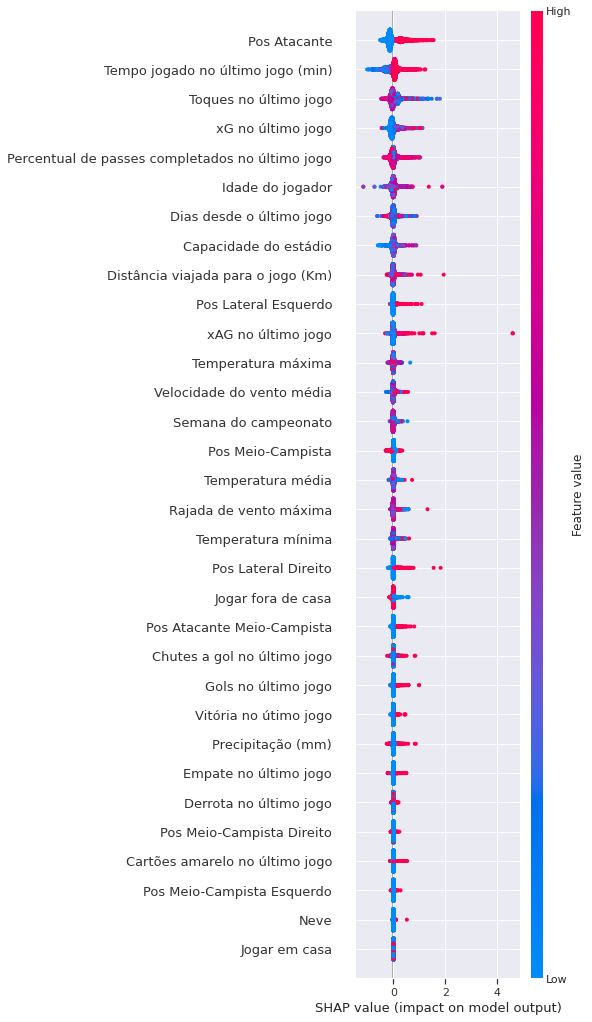

In [36]:
shap.summary_plot(shap_values, max_display=32)

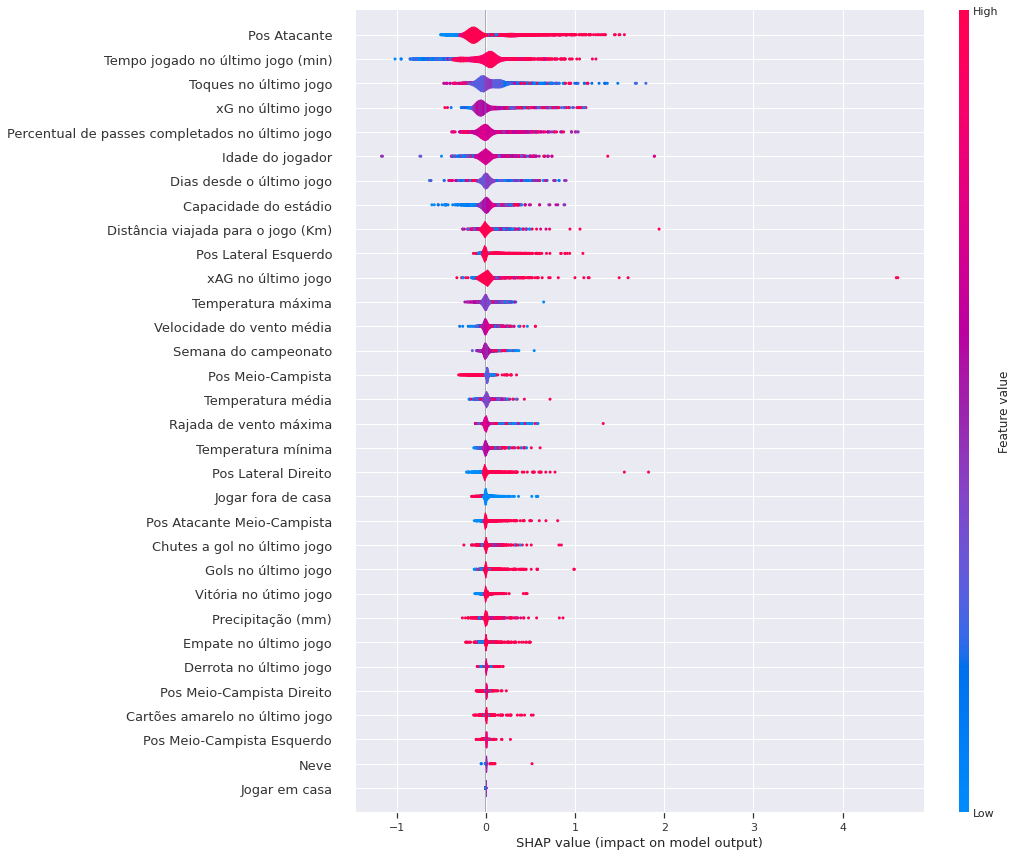

In [40]:
shap.summary_plot(shap_values, plot_type="violin", max_display=32, plot_size=(15, 12))

In [77]:
shap.force_plot(explainer.expected_value, shap_values.values, X)

In [86]:
class WaterfallData():
    def __init__ (self, shap_test, index):
        self.values = shap_test[index].values
        self.base_values = shap_test[index].base_values[0]
        self.data = shap_test[index].data
        self.feature_names = shap_test.feature_names
        self.display_data = None

def plot_player(shap_values, index):
    shap.plots.waterfall(WaterfallData(shap_values, index))

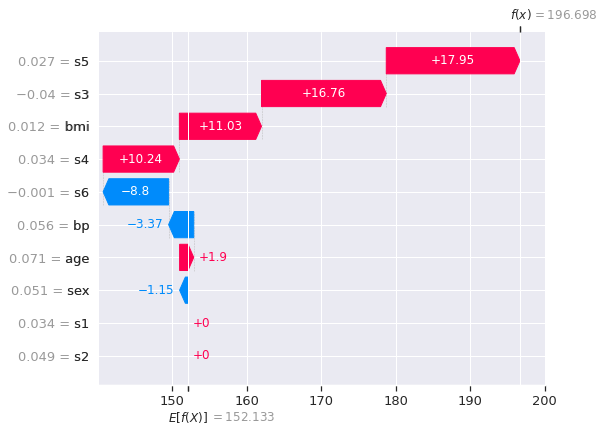

In [87]:
plot_player(shap_values, 0)